In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import PCA
from sklearn.decomposition import KernelPCA
from sklearn.decomposition import SparsePCA
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from scipy.stats import ttest_ind

from PIL import Image
from io import BytesIO

In [5]:
df = pd.read_csv("../data/train_cat_or_dog.csv")

df['is_cat'] = df.cat.map(lambda t: 1 if t else 0)
df['is_dog'] = df.dog.map(lambda t: 1 if t else 0)

cat_pawpularity = df[df.cat == 1].Pawpularity
dog_pawpularity = df[df.dog == 1].Pawpularity
neither_pawpularity = df[(df.is_dog | df.is_cat).map(lambda j: True if j == 0 else False)].Pawpularity

print(str(cat_pawpularity.shape) + " " + str(cat_pawpularity.mean()))
print(str(dog_pawpularity.shape) + " " + str(dog_pawpularity.mean()))
print(str(neither_pawpularity.shape) + " " + str(neither_pawpularity.mean()))

print(ttest_ind(dog_pawpularity, cat_pawpularity))
print(ttest_ind(neither_pawpularity, cat_pawpularity))
print(ttest_ind(neither_pawpularity, dog_pawpularity))

(3088,) 34.76360103626943
(3854,) 41.9154125583809
(2970,) 36.414478114478115
Ttest_indResult(statistic=14.091299399813899, pvalue=1.75579840850635e-44)
Ttest_indResult(statistic=3.5352191391755374, pvalue=0.0004104818876484506)
Ttest_indResult(statistic=-10.495793558925802, pvalue=1.4135549524724267e-25)


In [69]:
linearModel = LinearRegression()
linearModel.fit(X_train, y_train)
predictions = linearModel.predict(X_test)

print(np.sqrt(mean_squared_error(predictions, y_test)))
print(np.sqrt(mean_squared_error(linearModel.predict(X_train), y_train)))

20.244927712242625
20.483913093513944


In [70]:
linearModel.coef_

array([-1.96219037,  6.19627791])

In [71]:
linearModel.intercept_

37.20497111850167

In [72]:
mean = y_train.mean()
np.sqrt(mean_squared_error([mean for i in np.arange(0, y_test.shape[0])], y_test))

20.428874756100438

In [73]:
buckets = target.map(lambda t: round(t / 10))

<BarContainer object of 11 artists>

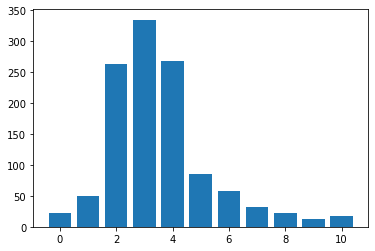

In [58]:
plt.bar(buckets.unique(), buckets[df.cat].value_counts()[buckets.unique()])

<BarContainer object of 11 artists>

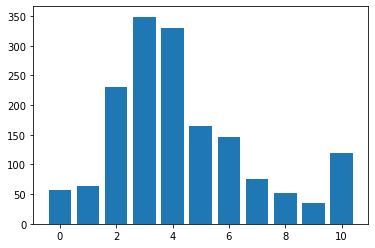

In [59]:
plt.bar(buckets.unique(), buckets[df.dog].value_counts()[buckets.unique()])

<BarContainer object of 11 artists>

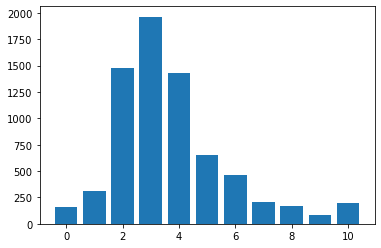

In [60]:
plt.bar(buckets.unique(), buckets[(df.is_dog | df.is_cat).map(lambda j: True if j == 0 else False)].value_counts()[buckets.unique()])

In [ ]:
features = df[['is_cat', 'is_dog']]